# Tarea ExPASy

## Ejercicio 1

In [20]:
from Bio.ExPASy import ScanProsite

from Bio import ExPASy

from Bio import SwissProt

from urllib.request import urlopen

from urllib.parse import urlencode




def scan(seq="", mirror="https://prosite.expasy.org", output="xml", **keywords):
    
    
    parameters = {"seq": seq, "output": output}
    
    ##Cambio para solo usar sig
    if seq is None:
        parameters = {"output": output}
    
    
    for key, value in keywords.items():
        if value is not None:
            parameters[key] = value

        
    command = urlencode(parameters)
    url = "%s/cgi-bin/prosite/PSScan.cgi?%s" % (mirror, command)
    print(url)
    handle = urlopen(url)
    return handle

# accesion = "PS00079\nPS00080" 

# secuencia = "HPHL1_HUMAN"

# linaje = Homo sapiens

accesion = str(input("Ingresa accesion numbers a comparar "))

linaje = str(input("Ingresa linaje "))

secuencia = str(input("Ingresa ID de secuencia contra la cual comparar "))

handle = scan(seq = secuencia, sig = accesion, lineage = linaje)

results = ScanProsite.read(handle)

handle = ExPASy.get_sprot_raw(results[0]["sequence_id"])

record = SwissProt.read(handle)

for r in results: 
    
    print(">Prosite #",r["signature_ac"], end = " ")
    
    print("Rango", end = " ")
    
    print(r["start"], end = "-")
    
    print(r["stop"], end = "\n")
    
    print(record.sequence[r["start"]:r["stop"]], end = "\n\n")
    


Ingresa accesion numbers a comparar PS00079 PS00080
Ingresa linaje Homo sapiens
Ingresa ID de secuencia contra la cual comparar HPHL1_HUMAN
https://prosite.expasy.org/cgi-bin/prosite/PSScan.cgi?seq=HPHL1_HUMAN&output=xml&sig=PS00079+PS00080&lineage=Homo+sapiens
>Prosite # PS00079 Rango 341-361
KWMITCQVSDHLQAGMLGQY

>Prosite # PS00079 Rango 694-714
IFRVFCATMPHLSRGMGQIY

>Prosite # PS00079 Rango 1043-1063
TWLLHCHVSDHIHAGMETTY

>Prosite # PS00080 Rango 1048-1059
CHVSDHIHAGM



## Ejercicio 2

In [8]:
from Bio.ExPASy import Enzyme

from Bio import ExPASy

from Bio import SwissProt

import re

lista = str(input("Ingresa tus accesion numbers separados por una diagonal "))

# O23729/O46647

# Crea lista a partir de input

lista = lista.split("/")

for element in lista:
    
    # Encuentra cada nombre de enzima en SwissProt a partir de los accesion numbers

    handle = ExPASy.get_sprot_raw(element)
    
    record = SwissProt.read(handle)
    
    ecNumber = re.findall("\d\.\d\.\d\.\d*", str(record.description))[0]

    print (f"Accesion No.#{element}    Enzima {ecNumber}")
    
   

Ingresa tus accesion numbers separados por una diagonal O23729/O46647
Accesion No.#O23729    Enzima 2.3.1.74
Accesion No.#O46647    Enzima 3.1.1.34


# Ejercicio 3

Ingresa ruta hacia tu archivo cellosaurus../test/archivos_trabajo/cellosaurus.txt
Ingresa especie a saber proporcion de sexos Homo sapiens
Especie: Homo sapiens
Total de mujeres: 39293
Total de hombres: 45977
Total de individuos: 85270


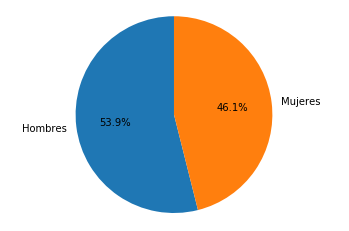

In [2]:
from Bio.ExPASy import cellosaurus

import matplotlib.pyplot as plt

path = str(input("Ingresa ruta hacia tu archivo cellosaurus"))

especie = str(input("Ingresa especie a saber proporcion de sexos "))

with open(path) as handle:
    
    records = cellosaurus.parse(handle)


    mujeres = 0

    hombres = 0

    total = 0
    
    # Recorre todos los records
    
    for record in records:
        
        if especie in record["OX"][0]:
            
            # Cuenta cuantos individuos de cada sexo hay en homo sapiens
            
            if record["SX"] == "Female":
            
                mujeres += 1
            
                total += 1
            
            if record["SX"] == "Male":
            
                hombres += 1
            
                total +=1
            
    print(f"Especie: {especie}")
    print(f"Total de mujeres: {mujeres}")
    print(f"Total de hombres: {hombres}")
    print(f"Total de individuos: {total}")
        
labels = "Hombres", "Mujeres"

sizes = [hombres, mujeres]

explode = (0, 0) 

# Realiza grafica de pie con matplotlib

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = False, startangle = 90)
ax1.axis('equal')  
plt.show()
